In [ ]:
import pandas as pd
import csv
from openpyxl import Workbook
from openpyxl.chart import BarChart, Series, Reference
import numpy as np

In [ ]:
from google.colab import drive
import os
drive.mount('/content/drive')
os.chdir("/content/drive/My Drive/Sanbercode/Tugas 2")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
penduduk = pd.read_csv('jumlah-penduduk-kota-bandung.csv')
penduduk.head()

,Kecamatan,Jumlah_Kelurahan,Jumlah_Penduduk
0,Bandung Kulon,8,142411
1,Babakan Ciparay,6,147096
2,Bojongloa Kaler,5,120405
3,Bojongloa Kidul,6,85668
4,Astanaanyar,6,68830


In [ ]:
penduduk['Total']=penduduk.sum(axis=1)
penduduk.head()

,Kecamatan,Jumlah_Kelurahan,Jumlah_Penduduk,Total
0,Bandung Kulon,8,142411,284838
1,Babakan Ciparay,6,147096,294204
2,Bojongloa Kaler,5,120405,240820
3,Bojongloa Kidul,6,85668,171348
4,Astanaanyar,6,68830,137672


In [ ]:
xx = pd.concat([penduduk['Jumlah_Kelurahan'], penduduk['Jumlah_Penduduk']],axis=1)
xx.head()

,Jumlah_Kelurahan,Jumlah_Penduduk
0,8,142411
1,6,147096
2,5,120405
3,6,85668
4,6,68830


In [ ]:
import math
xx['Total']=xx.sum(axis=1)
xx['Total'] = np.sqrt(xx['Total'])
xx.head()

,Jumlah_Kelurahan,Jumlah_Penduduk,Total,akar
0,8,142411,379.497132,754.768839
1,6,147096,385.651583,767.077571
2,5,120405,349.113690,694.002882
3,6,85668,294.812397,585.402426
4,6,68830,264.476555,524.732313


In [ ]:
luas_wilayah = pd.read_csv('luas-wilayah-menurut-kecamatan-di-kota-bandung-2017.csv')
luas_wilayah['Luas Wilayah (km2)'] = luas_wilayah['Luas Wilayah (m2)']/100
luas_wilayah.head()

,Nama Kecamatan,Luas Wilayah (m2),Luas Wilayah (km2)
0,Andir,4220000,42200.0
1,Antapani,4220000,42200.0
2,Arcamanik,7590000,75900.0
3,Astana Anyar,2680000,26800.0
4,Babakan Ciparay,7070000,70700.0


In [ ]:
kepadatan_penduduk = pd.concat([luas_wilayah['Nama Kecamatan'], penduduk['Jumlah_Penduduk'], luas_wilayah['Luas Wilayah (km2)']], axis=1)
kepadatan_penduduk.columns = ["Nama Kecamatan", "Jumlah_Penduduk", "Luas Wilayah"]
kepadatan_penduduk.head()

,Nama Kecamatan,Jumlah_Penduduk,Luas Wilayah
0,Andir,142411,42200.0
1,Antapani,147096,42200.0
2,Arcamanik,120405,75900.0
3,Astana Anyar,85668,26800.0
4,Babakan Ciparay,68830,70700.0


In [ ]:
kepadatan_penduduk['Kepadatan Penduduk'] = kepadatan_penduduk["Jumlah_Penduduk"]/kepadatan_penduduk["Luas Wilayah"]
kepadatan_penduduk.head()

,Nama Kecamatan,Jumlah_Penduduk,Luas Wilayah,Kepadatan Penduduk
0,Andir,142411,42200.0,3.374668
1,Antapani,147096,42200.0,3.485687
2,Arcamanik,120405,75900.0,1.586364
3,Astana Anyar,85668,26800.0,3.196567
4,Babakan Ciparay,68830,70700.0,0.973550


In [ ]:
data_kepadatan_penduduk = kepadatan_penduduk.drop(['Jumlah_Penduduk','Luas Wilayah'], axis=1)
data_kepadatan_penduduk.head()

,Nama Kecamatan,Kepadatan Penduduk
0,Andir,3.374668
1,Antapani,3.485687
2,Arcamanik,1.586364
3,Astana Anyar,3.196567
4,Babakan Ciparay,0.973550


In [ ]:
data_kepadatan_penduduk.to_csv('/content/drive/My Drive/Sanbercode/Tugas 2/data_kepadatan_penduduk.csv')

In [ ]:
wb = Workbook()
ws = wb.active

hasil = open('data_kepadatan_penduduk.csv')
rows = csv.reader(hasil, delimiter=',')

In [ ]:
index = 0
for row in rows:
    data_clean = []
    for i in row:
        try:
            i = float(i)
        except:
            pass
        data_clean.append(i)
    ws.append(data_clean)
    index +=1
len_row = len(data_clean)
len_row

3

In [ ]:
chart1 = BarChart()
chart1.type = "col"
chart1.style = 3
chart1.title = "Bar Chart"
chart1.y_axis.title = 'kepadatan penduduk'
chart1.x_axis.title = 'Nama Kecamatan'

In [ ]:
data = Reference(ws, min_col=3, min_row=1, max_row=index, max_col=len_row+1)
cats = Reference(ws, min_col=2, min_row=2, max_row=index)
chart1.height = 10 # default is 7.5
chart1.width = 30 # default is 15
chart1.add_data(data, titles_from_data=True)
chart1.set_categories(cats)
ws.add_chart(chart1, "G2")

In [ ]:
wb.save("/content/drive/My Drive/Sanbercode/Tugas 2/MilaPutriKartikaDewi.xlsx")

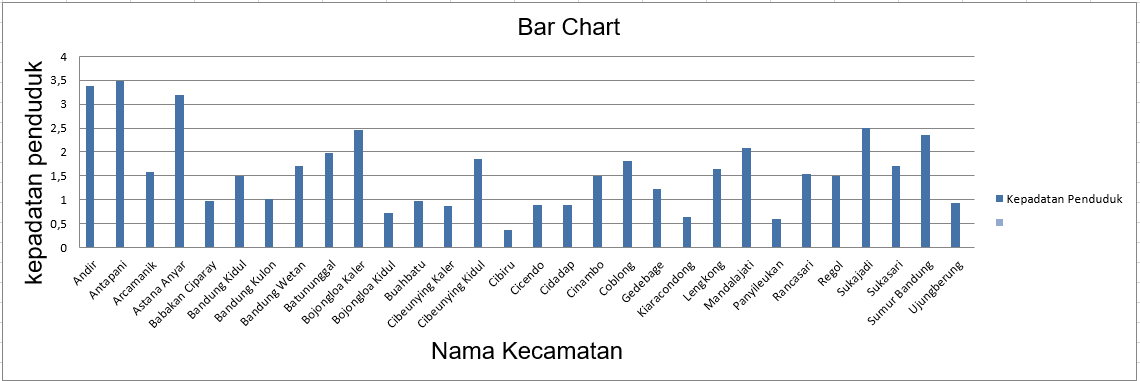